## Факторний аналіз 

Більше можна почитати [тут](https://www.earthinversion.com/geophysics/exploratory-factor-analysis/).   Але в коді є проблема, див. [тут](https://stackoverflow.com/questions/60411978/attributeerror-factoranalyzer-object-has-no-attribute-analyze). Якщо не встановлено пакет  factor_analyzer, то встановлюємо. 

In [1]:
#! pip install factor_analyzer

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib

В наступній табліиці наведено дані тестування типу особистості. Є 5 типів (колонки названі відповідно до першої літери:  Agreeableness, Conscientiousness, Extraversion, Neuroticism, and Openness),по 5 підтипів в кожній. Кожна змінна -це оцінка в шкалі від 1 до 6:  1 Very Inaccurate; 2 Moderately Inaccurate; 3 Slightly Inaccurate; 4 Slightly Accurate; 5 Moderately Accurate; 6 Very Accurate.

In [3]:
df1= pd.read_csv("bfi.csv")
df1.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


Відкинемо останні 3 колонки. 

In [4]:
df1.drop(['gender', 'education', 'age'],axis = 1,inplace=True)
# Dropping missing values rows
df1.dropna(inplace=True)
df1.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


Почнемо з теста сферичності Барлетта, за допомогою якого ми перевіряємо, ци є змінні некорельованими. Якщо так (тобто нульова гіпотеза про те, що матриця діагональна, справедлива), то нема потреюи проводити факторний аналіз. 

In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(18170.966350869232, 0.0)

Альтернативно, можна використати тест Kaiser–Meyer–Olkin (KMO), який дає змогу перевірити, наскільки дані підходять для того, щоб використати факторний аналіз. Відповідна статистика вимірює пропорцію дисперсії  серед змінніх, які можуть мати спільну дисперсію. Чим ближче це значення до 1, тим краще. Більше 0.8 вважається достатньо. Менше, ніж 0.5 - погано. 

In [6]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1)
kmo_model

0.848539722194922

Отже, нульова гіпотеза не виконана, проводимо факторний аналіз.  Задамо модель: 
$$
y - \mu = \Lambda f + \mathcal{E}. 
$$
Нам потрібно підібрати фактори $f$ і матрицю $\Lambda$.

In [7]:
fa = FactorAnalyzer()
fa.fit(df1)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

Отримали власні числа коваріаційної матриці. Щоб обрати достатню кількість власних чисел, що пояснює дисперсію, зродимо scree plot. 

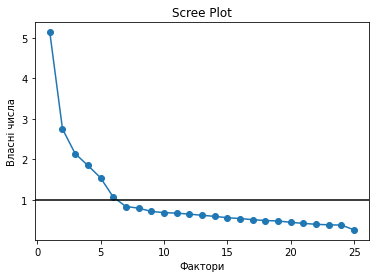

In [9]:
plt.scatter(range(1,df1.shape[1]+1),eigen_values)
plt.plot(range(1,df1.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Фактори')
plt.ylabel('Власні числа')
plt.axhline(y=1,c='k')

Отже, 6 власних чисел має бути досить. Знайдемо тепер 6 факторів. Причому можна застосувати поворот факторів. Наприклад, за допомогою **varimax**: шукаємо таку  матрицю $R$, яка б максимізувала по   $R$ (це метод Кайзера): 
$$
\frac1p \sum_{j=1}^k \sum_{i=1}^p (\Lambda R)_{ij}^4 - \sum_{j=1}^k \left(\frac1p \sum_{i=1}^p (\Lambda R)_{ij}^2 \right)^2\Longrightarrow  \max.
$$
Фактично, ми при цьому змінюємо базис, та знаходимо нову матрицю навантажень $\Lambda$. Елементи цієї матриці називаються loadings. 

In [10]:
fa.set_params(n_factors=6, rotation='varimax')
fa.fit(df1)
corr = fa.corr_
loadings = fa.loadings_

Тепер з'ясуємо, які змінні входять в який фактор. Для зручності ми  трохи переформатуємо таблицю. 

In [11]:
names = df1.loc['A1': 'O5']

In [14]:
df2 = pd.DataFrame.from_records(loadings, columns=['F1','F2','F3','F4', 'F5', 'F6'], index =[i  for i in names])
df2.head()

,F1,F2,F3,F4,F5,F6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519


Тепер зобразимо графічно, який змінні входять в який фактор.  Див [тут](https://medium.com/swlh/factor-analysis-characterising-companies-based-on-financial-metrics-3d5fcc4e8b6f). 

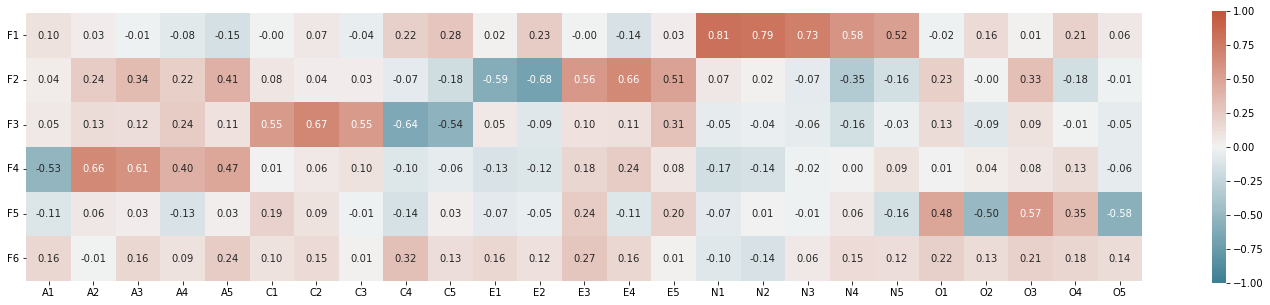

In [15]:
import seaborn as sns

plt.figure(figsize=(25,5))

# plot the heatmap for correlation matrix
ax = sns.heatmap(df2.T, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0);

Наприклад, фактор 4 (F4) формується за допомоги змінних А1--А5, причому А1 і А2--А5 мають протилежний вплив. 

Отримаємо ще наступну інформацію про модель. По-перше, отримаємо дисперсії навантажень (factor variances). 

In [16]:
np.round(fa.get_factor_variance(),2)

array([[2.73, 2.6 , 2.07, 1.71, 1.5 , 0.63],
       [0.11, 0.1 , 0.08, 0.07, 0.06, 0.03],
       [0.11, 0.21, 0.3 , 0.36, 0.42, 0.45]])

Насправді, значення в цьому масиві мають наступний сенс:

In [17]:
variances = np.round(fa.get_factor_variance(),2) 

df3 = pd.DataFrame.from_records(variances, columns=['F1','F2','F3','F4', 'F5', 'F6'], \
                                index = {'SS loadings', 'Proportional Vars', 'Cumulative Vars'})
df3.head()

,F1,F2,F3,F4,F5,F6
Cumulative Vars,2.73,2.60,2.07,1.71,1.50,0.63
SS loadings,0.11,0.10,0.08,0.07,0.06,0.03
Proportional Vars,0.11,0.21,0.30,0.36,0.42,0.45


Як ми бачимо, 6 факторів пояснюють $45\%$ дисперсії.  Отримаємо тепер частки спільної дисперсії, яка пояснена факторами (communalities)
$$
\hat{h}_i^2 = \sum_{j=1}^6 \hat{\lambda}_{ij}^2, \quad  i = 1, \dots,25. 
$$

In [18]:
np.round(fa.get_communalities(),2)

array([0.33, 0.52, 0.53, 0.3 , 0.48, 0.36, 0.5 , 0.32, 0.59, 0.43, 0.4 ,
       0.56, 0.48, 0.56, 0.4 , 0.7 , 0.67, 0.54, 0.51, 0.35, 0.35, 0.3 ,
       0.49, 0.25, 0.36])

І у вигляді табдлиці:

In [19]:
communalities = np.round(fa.get_communalities(),2).reshape(25,1)

df4 = pd.DataFrame.from_records(communalities, columns = ['h2'], index = [i for i in names])
df4.head()

,h2
A1,0.33
A2,0.52
A3,0.53
A4,0.30
A5,0.48


Як ми бачимо, значення суттєво менші за 1, отже,фактори погано пояснюють модель. 